In [1]:
import networkx as nx
import matplotlib.pyplot as plt

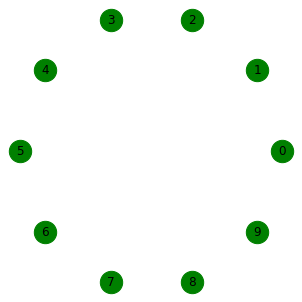

In [4]:
# 1.创建孤立节点图
n = 10
g1 = nx.Graph()
g1.add_nodes_from(range(n))
plt.figure(figsize=(4,4))
nx.draw(g1, pos=nx.circular_layout(g1), node_size = 500, node_color="green", with_labels=True)

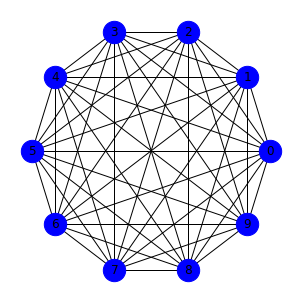

In [5]:
# 2.创建完全图
g2 = nx.complete_graph(n)
plt.figure(figsize=(4,4))
nx.draw(g2, pos=nx.circular_layout(g2), node_size=500, node_color="blue", with_labels=True)

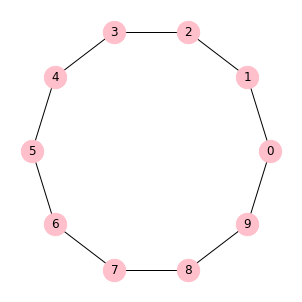

In [7]:
# 3.创建一维环状图
g3 = nx.cycle_graph(n)
plt.figure(figsize=(4,4))
nx.draw(g3, pos=nx.circular_layout(g3), node_size=500, node_color="pink", with_labels=True)

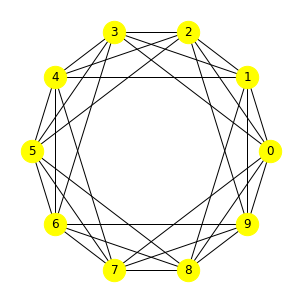

In [10]:
# 4.创建K近邻耦合图
g4 = nx.watts_strogatz_graph(n, 6, 0)  # 6-近邻耦合图
plt.figure(figsize=(4,4))
nx.draw(g4, pos=nx.circular_layout(g4), node_size=500, node_color="yellow", with_labels=True)

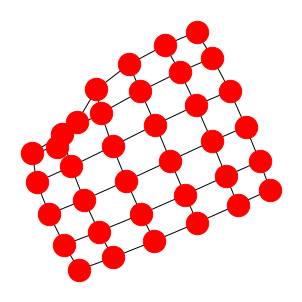

In [21]:
# 5.创建二维方格图
g5 = nx.grid_graph((6, 6), periodic=False)
plt.figure(figsize=(4,4))
nx.draw(g5, node_size=500, node_color="red", with_labels=False)